In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model

import shap

/Users/vinh/miniconda3/envs/thesis/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/vinh/miniconda3/envs/thesis/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimiz

----
# Load Models & Data

In [52]:
to_drop = ['loan_status', 'id', 'issue_d', 'year', 'grade', 'sub_grade']

train_balanced = pd.read_csv('/Users/vinh/FS/thesis/data/train_balanced.csv')
x_train_balanced = train_balanced.drop(to_drop, axis = 1)
y_train_balanced = train_balanced[['loan_status']]
x_train_balanced_sampled, _, y_train_balanced_sampled, _ = train_test_split(x_train_balanced, y_train_balanced, train_size = 50000, stratify = y_train_balanced)

test = pd.read_csv('/Users/vinh/FS/thesis/data/test_final.csv')
x_test = test.drop(to_drop, axis = 1)
y_test = test[['loan_status']]
x_test_sampled, _, y_test_sampled, _ = train_test_split(x_train_balanced, y_train_balanced, train_size = 50000, stratify = y_train_balanced)

In [51]:
xgb_clf_balanced = pickle.load(open('/Users/vinh/FS/thesis/data/models/xgb_clf_balanced.sav', 'rb'))
rf_balanced = pickle.load(open('/Users/vinh/FS/thesis/data/models/rf_balanced.sav', 'rb'))

----
# SHAP

#### ---- XGBoost Balanced ----

In [54]:
xgb_balanced_explainer = shap.TreeExplainer(xgb_clf_balanced)
xgb_balanced_sv = xgb_balanced_explainer(x_test_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


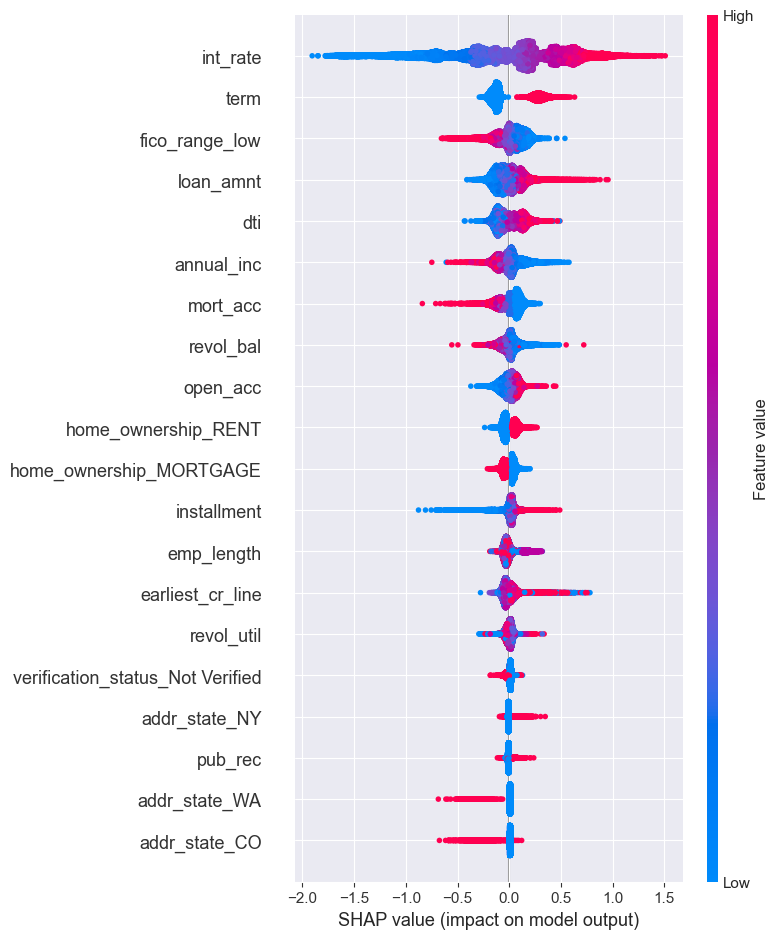

In [55]:
shap.summary_plot(xgb_balanced_sv, x_test_sampled)

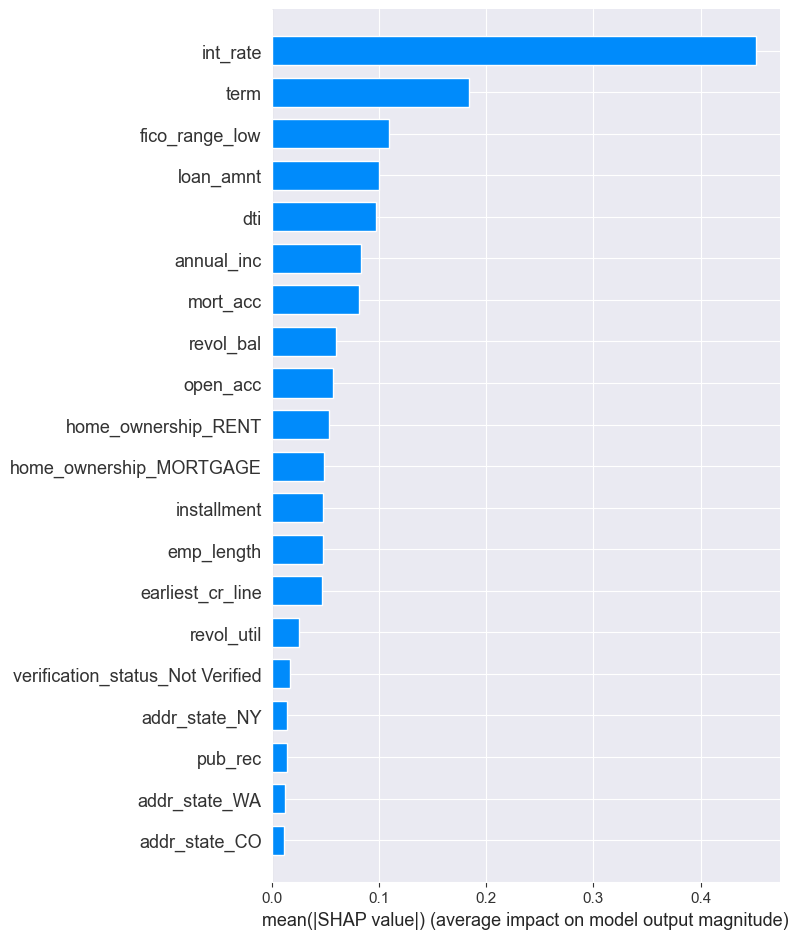

In [77]:
shap.summary_plot(xgb_balanced_sv, x_test_sampled, plot_type = 'bar')

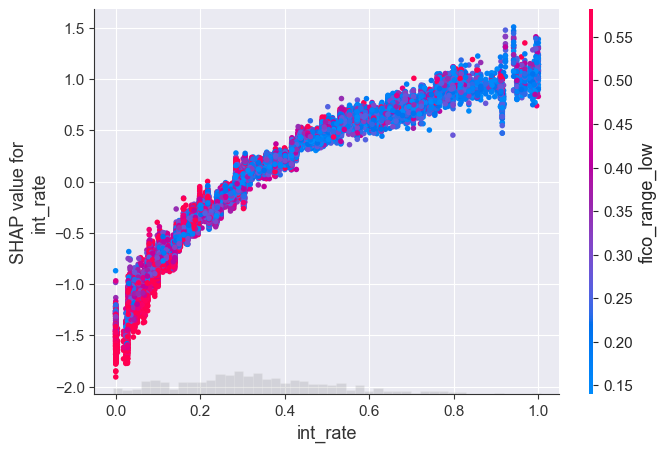

In [71]:
shap.plots.scatter(xgb_balanced_sv[:, 'int_rate'], color = xgb_balanced_sv)

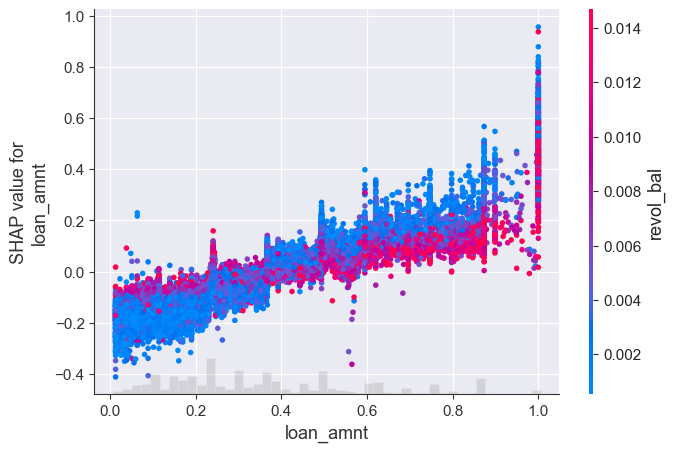

In [74]:
shap.plots.scatter(xgb_balanced_sv[:, 'loan_amnt'], color = xgb_balanced_sv)

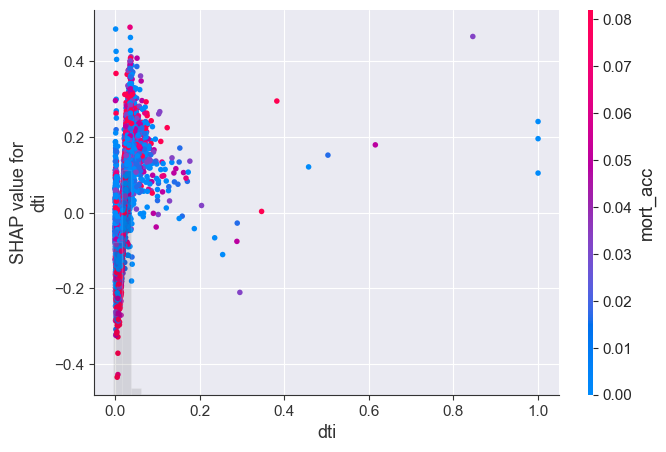

In [76]:
shap.plots.scatter(xgb_balanced_sv[:, 'dti'], color = xgb_balanced_sv)

#### ---- Random Forest Balanced ----

In [57]:
rf_balanced_explainer = shap.TreeExplainer(rf_balanced)
rf_balanced_sv = rf_balanced_explainer(x_test_sampled)

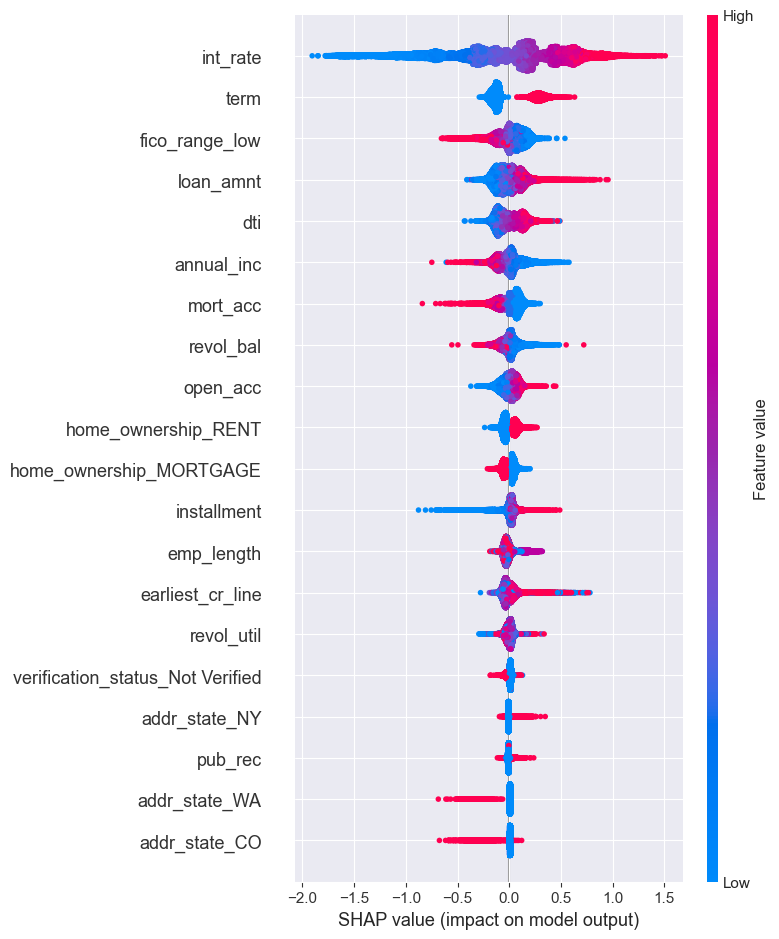

In [58]:
shap.summary_plot(xgb_balanced_sv, x_test_sampled)

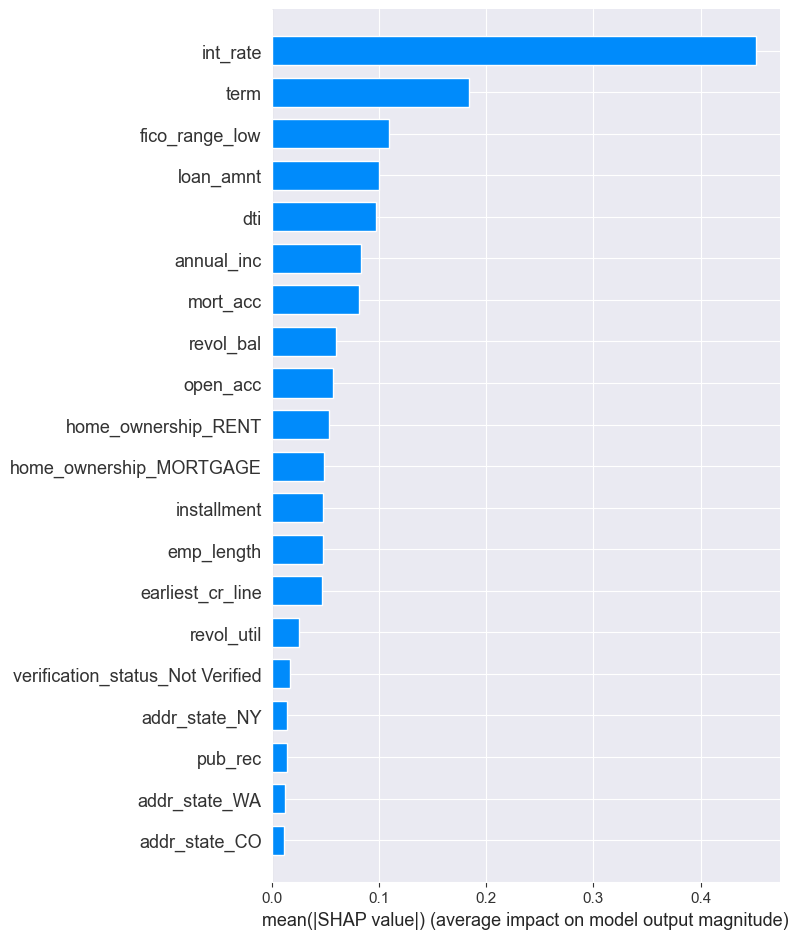

In [59]:
shap.summary_plot(xgb_balanced_sv, x_test_sampled, plot_type = 'bar')